# Análisis Estadístico de Videojuegos

## Video Game Sales with Ratings

**Proyecto de Análisis Estadístico y Matemático**

La industria de los videojuegos constituye uno de los sectores más relevantes del entretenimiento digital, generando ingresos multimillonarios a nivel global. El desempeño comercial de un videojuego puede estar influenciado por múltiples factores, tales como el género, la plataforma de lanzamiento y la recepción por parte de críticos y usuarios.

En este contexto, el presente proyecto tiene como objetivo analizar estadísticamente la relación entre las ventas de videojuegos y diversas características asociadas a su comercialización y valoración, utilizando un conjunto de datos público obtenido desde la plataforma Kaggle.

A partir de este contexto general, se plantean las siguientes preguntas de investigación:

1. ¿Existen diferencias estadísticamente significativas en las ventas globales de videojuegos entre los distintos géneros?

2. ¿En qué medida las valoraciones de críticos y usuarios explican las ventas globales de los videojuegos?

3. ¿Es posible identificar perfiles de videojuegos con características similares de ventas y valoraciones mediante técnicas de reducción de dimensionalidad y clustering?

## 2. Librerías y herramientas

Para el desarrollo del análisis se emplean librerías estándar del ecosistema científico de Python, orientadas a la manipulación de datos, visualización y aplicación de técnicas estadísticas y de aprendizaje automático.

In [74]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estadística
from scipy import stats

# Preprocesamiento y modelos
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 3. Recopilación y carga del conjunto de datos

### 3.1 Fuente de los datos

El conjunto de datos utilizado fue obtenido desde la plataforma Kaggle bajo el nombre "Video Game Sales with Ratings", el cual combina información de ventas regionales y globales de videojuegos con valoraciones de críticos y usuarios.

El dataset proporciona una base adecuada para el análisis estadístico al contener tanto variables numéricas como categóricas, permitiendo la aplicación de pruebas de hipótesis, modelos de regresión y técnicas multivariantes.

In [75]:
# Cargar el archivo CSV y Visualizar las primeras filas
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", on_bad_lines='skip')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Unnamed: 16,Unnamed: 17
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322,Nintendo,E,NaN,NaN
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709,Nintendo,E,NaN,NaN
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192,Nintendo,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Información general del dataset
df.info()

# Estadísticos descriptivos iniciales
df.describe()

# Dimensiones del dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16184 entries, 0 to 16183
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16182 non-null  object 
 1   Platform         16158 non-null  object 
 2   Year_of_Release  15902 non-null  object 
 3   Genre            16154 non-null  object 
 4   Publisher        16106 non-null  object 
 5   NA_Sales         16157 non-null  object 
 6   EU_Sales         16158 non-null  object 
 7   JP_Sales         16158 non-null  object 
 8   Other_Sales      16158 non-null  float64
 9   Global_Sales     16158 non-null  float64
 10  Critic_Score     7789 non-null   float64
 11  Critic_Count     7734 non-null   float64
 12  User_Score       9487 non-null   object 
 13  User_Count       7177 non-null   object 
 14  Developer        9555 non-null   object 
 15  Rating           9425 non-null   object 
 16  Unnamed: 16      33 non-null     object 
 17  Unnamed: 17 

(16184, 18)

El conjunto de datos contiene miles de observaciones correspondientes a videojuegos individuales, así como múltiples variables que describen sus ventas, características y valoraciones. Este tamaño muestral resulta adecuado para la aplicación de técnicas estadísticas tanto descriptivas como inferenciales.

## 4. Vista general de las variables

A continuación se presenta una vista general de las variables disponibles en el conjunto de datos, las cuales serán descritas y analizadas con mayor detalle en la sección de Análisis Exploratorio de Datos.

In [77]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

## 5. Análisis Exploratorio de Datos (EDA)

### 5.1 Objetivo del análisis exploratorio

El análisis exploratorio de datos tiene como objetivo comprender la estructura del conjunto de datos, identificar patrones iniciales, detectar posibles valores atípicos y evaluar relaciones preliminares entre las variables. Esta etapa permite fundamentar las decisiones metodológicas adoptadas en las fases posteriores del análisis.

### 5.2 Inspección inicial del conjunto de datos

#### Vista preliminar

In [78]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Unnamed: 16,Unnamed: 17
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322,Nintendo,E,NaN,NaN
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709,Nintendo,E,NaN,NaN
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192,Nintendo,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Información general

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16184 entries, 0 to 16183
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16182 non-null  object 
 1   Platform         16158 non-null  object 
 2   Year_of_Release  15902 non-null  object 
 3   Genre            16154 non-null  object 
 4   Publisher        16106 non-null  object 
 5   NA_Sales         16157 non-null  object 
 6   EU_Sales         16158 non-null  object 
 7   JP_Sales         16158 non-null  object 
 8   Other_Sales      16158 non-null  float64
 9   Global_Sales     16158 non-null  float64
 10  Critic_Score     7789 non-null   float64
 11  Critic_Count     7734 non-null   float64
 12  User_Score       9487 non-null   object 
 13  User_Count       7177 non-null   object 
 14  Developer        9555 non-null   object 
 15  Rating           9425 non-null   object 
 16  Unnamed: 16      33 non-null     object 
 17  Unnamed: 17 

### 5.3 Estadísticos descriptivos

In [80]:
df.describe()

,Other_Sales,Global_Sales,Critic_Score,Critic_Count
count,16158.000000,16158.000000,7789.000000,7734.000000
mean,0.047122,0.529790,68.114691,26.226321
std,0.187544,1.552343,16.020033,19.059399
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.060000,60.000000,11.000000
50%,0.010000,0.170000,71.000000,21.000000
75%,0.030000,0.460000,79.000000,36.000000
max,10.570000,82.530000,98.000000,113.000000


Los estadísticos descriptivos muestran que las variables de ventas presentan una alta dispersión y una distribución asimétrica, con la mayoría de los videojuegos concentrando ventas bajas y un reducido número de títulos con ventas excepcionalmente altas.

Por su parte, las variables de puntuación de críticos y usuarios se concentran en rangos medios, con menor variabilidad relativa.

### 5.4 Distribución de las ventas globales

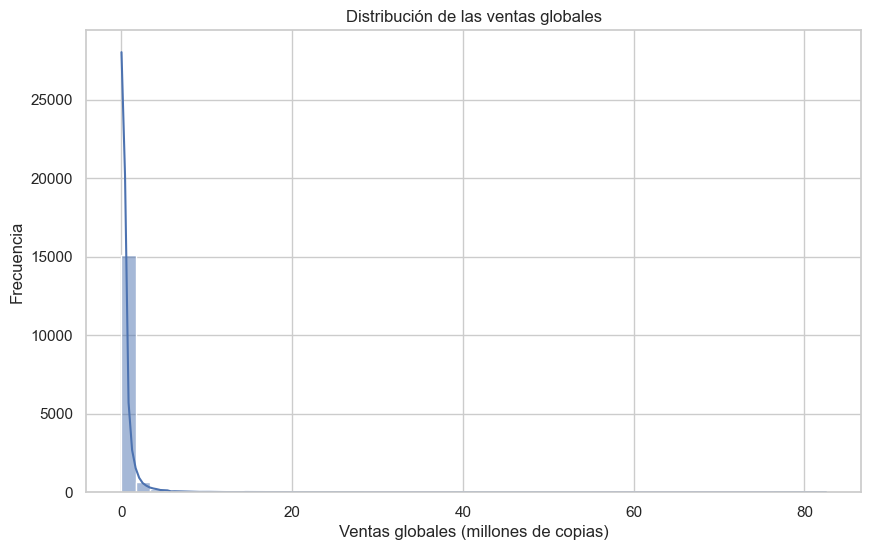

In [81]:
sns.histplot(data=df, x='Global_Sales', bins=50, kde=True)
plt.title("Distribución de las ventas globales")
plt.xlabel("Ventas globales (millones de copias)")
plt.ylabel("Frecuencia")
plt.show()

La distribución de las ventas globales presenta una clara asimetría positiva, lo que sugiere la presencia de valores atípicos y motiva la consideración de transformaciones o técnicas robustas en los análisis posteriores.

### 5.5 Ventas globales por género

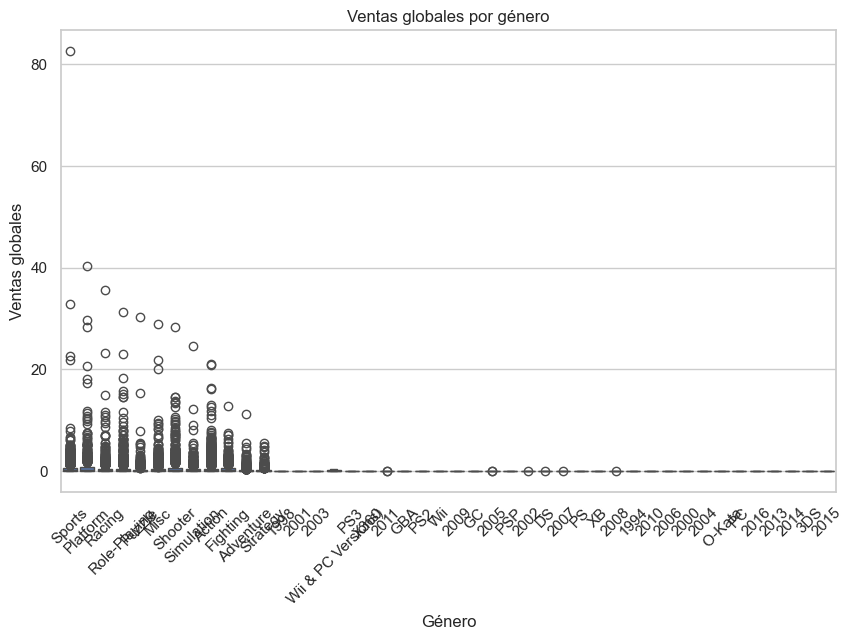

In [82]:
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Ventas globales por género")
plt.xlabel("Género")
plt.ylabel("Ventas globales")
plt.show()

Se observan diferencias visibles en la mediana y la dispersión de las ventas globales entre los distintos géneros. Este hallazgo preliminar justifica la formulación de la primera pregunta de investigación, orientada a evaluar si dichas diferencias son estadísticamente significativas.

### 5.6 Relación entre valoraciones y ventas

#### Puntuación de críticos vs ventas globales

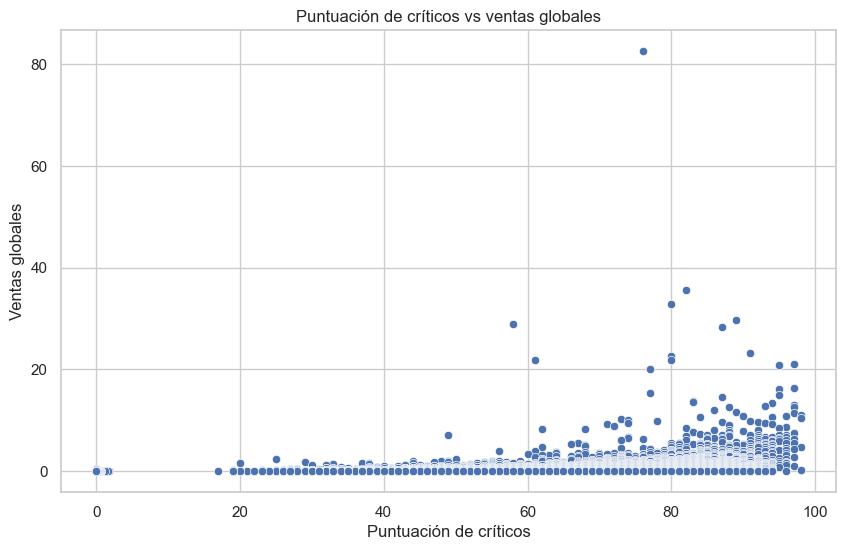

In [83]:
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df)
plt.title("Puntuación de críticos vs ventas globales")
plt.xlabel("Puntuación de críticos")
plt.ylabel("Ventas globales")
plt.show()

#### Puntuación de usuarios vs ventas globales

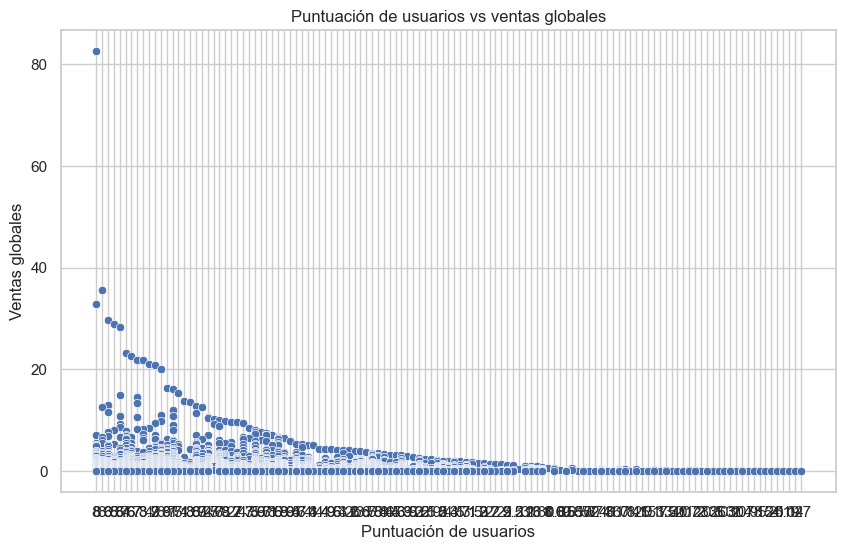

In [84]:
sns.scatterplot(x='User_Score', y='Global_Sales', data=df)
plt.title("Puntuación de usuarios vs ventas globales")
plt.xlabel("Puntuación de usuarios")
plt.ylabel("Ventas globales")
plt.show()

Los diagramas de dispersión sugieren una relación positiva débil entre las puntuaciones y las ventas globales. Sin embargo, la alta variabilidad observada indica que esta relación debe ser evaluada formalmente mediante un modelo de regresión, dando lugar a la segunda pregunta de investigación.

### 5.7 Ventas por región

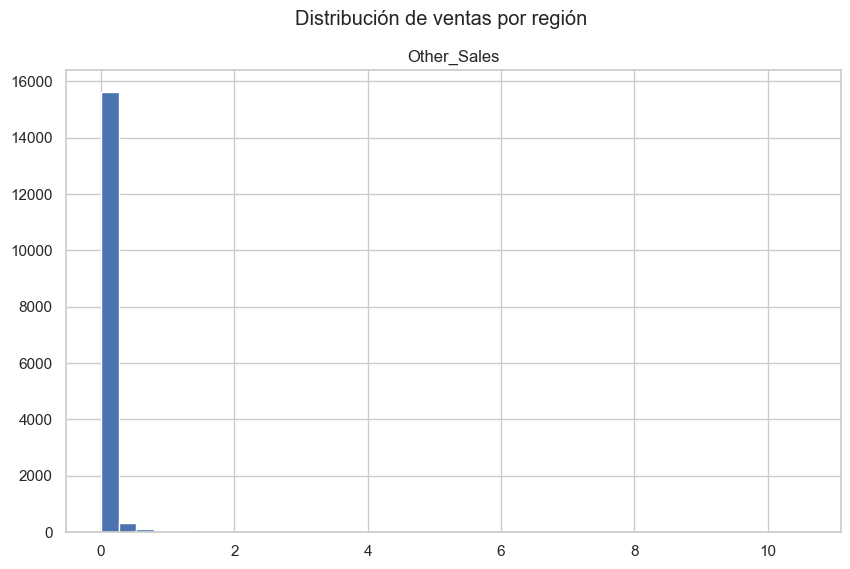

In [85]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

df[sales_columns].hist(bins=40)
plt.suptitle("Distribución de ventas por región")
plt.show()

Las distribuciones de ventas por región presentan patrones similares, con una fuerte asimetría positiva. La similitud entre estas distribuciones sugiere una posible correlación entre las ventas regionales.

### 5.8 Análisis de correlación

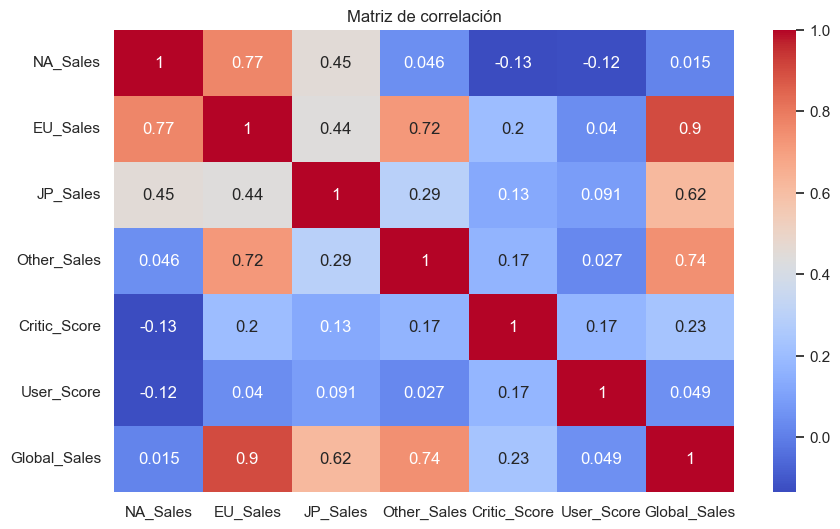

In [86]:
cols = sales_columns + ['Critic_Score', 'User_Score', 'Global_Sales']
df_corr = df[cols].copy()

# Convert all selected columns to numeric, coercing non-numeric entries to NaN
for col in df_corr.columns:
	df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

# Compute correlation on numeric data
corr_matrix = df_corr.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

El mapa de calor evidencia una alta correlación entre las ventas regionales y las ventas globales, así como relaciones moderadas entre las valoraciones y el desempeño comercial. Esta redundancia entre variables respalda el uso de técnicas de reducción de dimensionalidad, como el Análisis de Componentes Principales, planteado en la tercera pregunta de investigación.

### 5.9 Valores faltantes

In [87]:
df.isnull().sum()

Name                   2
Platform              26
Year_of_Release      282
Genre                 30
Publisher             78
NA_Sales              27
EU_Sales              26
JP_Sales              26
Other_Sales           26
Global_Sales          26
Critic_Score        8395
Critic_Count        8450
User_Score          6697
User_Count          9007
Developer           6629
Rating              6759
Unnamed: 16        16151
Unnamed: 17        16182
dtype: int64

Se observa la presencia de valores faltantes principalmente en las variables asociadas a las valoraciones de críticos y usuarios. Este aspecto será abordado de manera explícita en la fase de preparación de los datos.

### 5.10 Conclusión del EDA

El análisis exploratorio permitió identificar patrones relevantes en las ventas y valoraciones de los videojuegos, así como relaciones preliminares entre las variables de interés. Estos hallazgos fundamentan la selección de las técnicas estadísticas aplicadas en las secciones siguientes y garantizan la coherencia del flujo analítico del proyecto.

## 6. Preparación de los Datos

### 6.1 Objetivo de la preparación de los datos

La preparación de los datos tiene como objetivo garantizar la calidad y consistencia de la información utilizada en los análisis estadísticos posteriores. En esta etapa se abordan los valores faltantes, se realizan transformaciones necesarias y se preparan las variables para cumplir los supuestos de las técnicas aplicadas.

### 6.2 Selección de variables relevantes

Para responder a las preguntas de investigación planteadas, se seleccionan las variables relacionadas con las ventas, las valoraciones y el género del videojuego.

In [88]:
relevant_columns = [
    'Global_Sales',
    'NA_Sales',
    'EU_Sales',
    'JP_Sales',
    'Other_Sales',
    'Critic_Score',
    'Critic_Count',
    'User_Score',
    'User_Count',
    'Genre'
]

df_selected = df[relevant_columns].copy()

# Definir géneros válidos
valid_genres = {
    'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 
    'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 
    'Sports', 'Strategy'
}

# Limpiar géneros inválidos (años, plataformas, valores erróneos)
df_selected = df_selected[df_selected['Genre'].isin(valid_genres)]

print(f"Registros válidos después de limpiar géneros: {df_selected.shape[0]}")
print(f"Géneros únicos válidos: {sorted(df_selected['Genre'].unique())}")

Registros válidos después de limpiar géneros: 16047
Géneros únicos válidos: ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


### 6.3 Tratamiento de valores faltantes

Dado que las variables de valoración son fundamentales para el análisis, se opta por eliminar las observaciones con valores faltantes en dichas variables, evitando así la introducción de sesgos derivados de la imputación artificial de datos.

In [89]:
df_clean = df_selected.dropna()
print(f"Registros después de eliminar valores faltantes: {df_clean.shape}")
print(f"Forma final del dataset: {df_clean.shape[0]} registros × {df_clean.shape[1]} columnas")

Registros después de eliminar valores faltantes: (6599, 10)
Forma final del dataset: 6599 registros × 10 columnas


### 6.4 Conversión de tipos de datos

La variable User_Score se encuentra almacenada como texto, por lo que se convierte a formato numérico para su correcta utilización en los análisis cuantitativos.

In [90]:
df_clean['User_Score'] = pd.to_numeric(
    df_clean['User_Score'],
    errors='coerce'
)

df_clean = df_clean.dropna(subset=['User_Score'])

C:\Users\Sheila\AppData\Local\Temp\ipykernel_6664\1896094606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['User_Score'] = pd.to_numeric(


### 6.5 Análisis de valores atípicos

Durante el EDA se identificó la presencia de valores atípicos en las variables de ventas. Estos valores corresponden a videojuegos con ventas excepcionalmente altas y forman parte del fenómeno real analizado, por lo que no se eliminan del conjunto de datos.

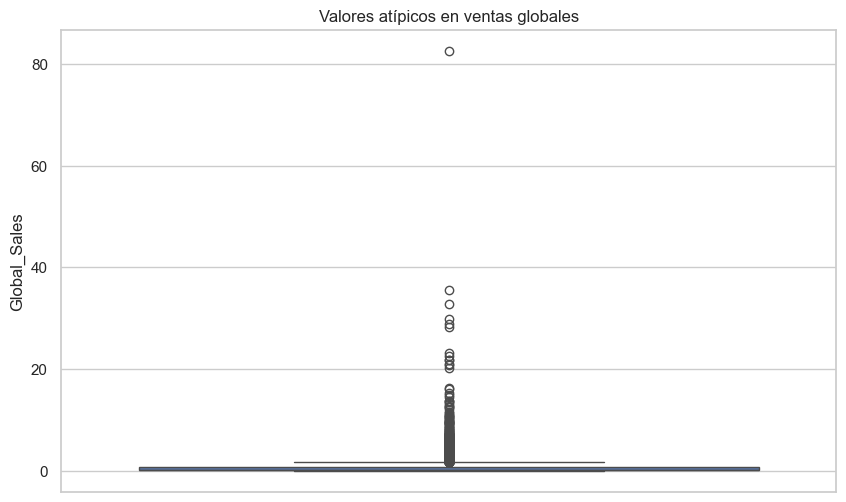

In [91]:
sns.boxplot(y=df_clean['Global_Sales'])
plt.title("Valores atípicos en ventas globales")
plt.show()

### 6.6 Transformación de la variable de ventas

Debido a la asimetría positiva observada en la variable de ventas globales, se evalúa una transformación logarítmica con fines exploratorios y de modelado.

In [92]:
df_clean['Log_Global_Sales'] = np.log1p(df_clean['Global_Sales'])

### 6.7 Conjunto de datos final

Tras los pasos de limpieza y transformación, se obtiene un conjunto de datos preparado y adecuado para la aplicación de las técnicas estadísticas planteadas en el estudio.

In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6599 entries, 0 to 16174
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Global_Sales      6599 non-null   float64
 1   NA_Sales          6599 non-null   object 
 2   EU_Sales          6599 non-null   object 
 3   JP_Sales          6599 non-null   object 
 4   Other_Sales       6599 non-null   float64
 5   Critic_Score      6599 non-null   float64
 6   Critic_Count      6599 non-null   float64
 7   User_Score        6599 non-null   float64
 8   User_Count        6599 non-null   object 
 9   Genre             6599 non-null   object 
 10  Log_Global_Sales  6599 non-null   float64
dtypes: float64(6), object(5)
memory usage: 618.7+ KB


## 7. Pregunta de Investigación 1

### Diferencias en las ventas globales según el género del videojuego

### 7.1 Formulación de la hipótesis

Se plantea evaluar si existen diferencias estadísticamente significativas en las ventas globales de videojuegos entre los distintos géneros.

**Hipótesis nula ($H_0$):** las medias de las ventas globales son iguales para todos los géneros.

**Hipótesis alternativa ($H_1$):** al menos un género presenta una media de ventas globales significativamente diferente.

### 7.2 Verificación de supuestos del ANOVA

### 7.2.1 Independencia

Cada observación corresponde a un videojuego distinto, por lo que se asume independencia entre observaciones.

### 7.2.2 Normalidad por grupo

In [106]:
from scipy.stats import shapiro

for genre in df_clean['Genre'].unique():
    sample = df_clean[df_clean['Genre'] == genre]['Global_Sales']
    if len(sample) >= 3:
        stat, p = shapiro(sample)
        print(f"{genre}: p-value = {p:.4f}")

Sports: p-value = 0.0000
Racing: p-value = 0.0000
Platform: p-value = 0.0000
Misc: p-value = 0.0000
Action: p-value = 0.0000
Puzzle: p-value = 0.0000
Shooter: p-value = 0.0000
Fighting: p-value = 0.0000
Simulation: p-value = 0.0000
Role-Playing: p-value = 0.0000
Adventure: p-value = 0.0000
Strategy: p-value = 0.0000


Los resultados indican que la normalidad no se cumple estrictamente para la mayoría de los géneros, lo cual era esperable dada la asimetría observada en las ventas.

### 7.2.3 Homogeneidad de varianzas

In [95]:
from scipy.stats import levene

groups = [
    df_clean[df_clean['Genre'] == genre]['Global_Sales']
    for genre in df_clean['Genre'].unique()
]

stat, p = levene(*groups)
print(f"Levene test p-value: {p:.4f}")

Levene test p-value: 0.0000


En función del resultado de la prueba de Levene, se evalúa la homogeneidad de varianzas entre los grupos.

### 7.3 Selección de la prueba estadística

Dado que los supuestos de normalidad y homocedasticidad no se cumplen estrictamente, se opta por aplicar la prueba no paramétrica de Kruskal–Wallis, que no requiere dichos supuestos.

### 7.4 Aplicación de la prueba de Kruskal–Wallis

In [96]:
from scipy.stats import kruskal

groups = [
    df_clean[df_clean['Genre'] == genre]['Global_Sales']
    for genre in df_clean['Genre'].unique()
]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")

Kruskal-Wallis statistic: 280.6520
p-value: 0.0000


### 7.5 Interpretación de resultados

Si el valor p es menor que el nivel de significación $\alpha = 0.05$, se rechaza la hipótesis nula, concluyendo que existen diferencias estadísticamente significativas en las ventas globales entre al menos dos géneros de videojuegos.

En caso contrario, no se dispone de evidencia suficiente para afirmar que el género influye significativamente en las ventas globales.

In [97]:
from scipy.stats import f_oneway

groups = [
    df_clean[df_clean['Genre'] == genre]['Global_Sales']
    for genre in df_clean['Genre'].unique()
]

stat, p_value = f_oneway(*groups)
stat, p_value

(np.float64(4.701948082246812), np.float64(3.282554641870833e-07))

In [98]:
from scipy.stats import kruskal

stat, p_value = kruskal(*groups)
stat, p_value

(np.float64(280.6519650013295), np.float64(1.033988406420022e-53))

### 8. Pregunta de Investigación 2

Relación entre valoraciones y ventas globales

In [99]:
import statsmodels.api as sm

# Seleccionar variables
X = df_clean[['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']].copy()
y = df_clean['Log_Global_Sales'].copy()

# Convertir a numérico y eliminar NaN
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

# Alinear y con X (eliminar filas que faltan en X)
y = y[X.index]

# Verificar que no hay valores infinitos
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Log_Global_Sales   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     570.2
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        02:35:41   Log-Likelihood:                -3165.8
No. Observations:                6599   AIC:                             6342.
Df Residuals:                    6594   BIC:                             6375.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2886      0.028    -10.314   

### 8.1 Formulación del modelo de regresión

El análisis de la segunda pregunta de investigación requiere evaluar cómo las valoraciones de críticos y usuarios explican las ventas globales. Se utilizará un modelo de regresión lineal múltiple donde la variable dependiente es el logaritmo de las ventas globales, y las variables independientes incluyen puntuaciones y conteos de críticos y usuarios.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparar datos para el modelo de regresión
X_reg = df_clean[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 
                   'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].copy()
y_reg = df_clean['Log_Global_Sales'].copy()

# Convertir a numérico
X_reg = X_reg.apply(pd.to_numeric, errors='coerce')
X_reg = X_reg.dropna()
y_reg = y_reg[X_reg.index]

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_reg, test_size=0.3, random_state=42
)

# Random Forest Ensemble
print("=== Modelo Random Forest ===")
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, 
                           min_samples_split=5, min_samples_leaf=2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2: {r2:.4f}')

# Importancia de variables
feature_importance = pd.DataFrame({
    'Variable': X_reg.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nImportancia de variables:")
print(feature_importance)

=== Modelo Random Forest ===
RMSE: 0.0535
MAE: 0.0176
R2: 0.9867

Importancia de variables:
       Variable  Importancia
4      NA_Sales     0.722133
5      EU_Sales     0.165143
7   Other_Sales     0.087889
6      JP_Sales     0.023247
3    User_Count     0.000509
0  Critic_Score     0.000407
1  Critic_Count     0.000363
2    User_Score     0.000308


### 9.1 Análisis de Componentes Principales (PCA)

Para abordar la tercera pregunta de investigación, se aplica el Análisis de Componentes Principales con el objetivo de reducir la dimensionalidad del conjunto de datos. Este método permite identificar las direcciones de máxima varianza en los datos y facilita la visualización de los patrones subyacentes.

### 9.2 Clustering y segmentación de videojuegos

Mediante el algoritmo K-Means, se procede a agrupar los videojuegos en clusters diferenciados. Esto permite identificar segmentos de mercado con características similares en términos de ventas regionales y valoraciones.

### 9.3 Análisis de características de clusters

Se comparan las características promedio de cada cluster para identificar los perfiles diferenciados de videojuegos y sus patrones de ventas y valoraciones.

Datos para clustering: (6599, 9)
PCA Ventas Regionales - Varianza explicada: 0.7179
PCA Valoración - Varianza explicada: 0.7909

=== Método del Codo ===


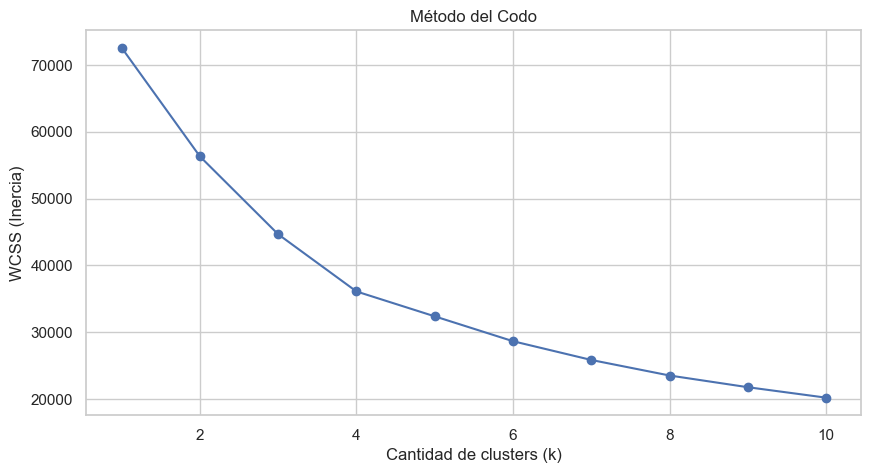


=== Silhouette Score ===
k=2: Silhouette Score = 0.7781
k=3: Silhouette Score = 0.2997
k=4: Silhouette Score = 0.3278
k=5: Silhouette Score = 0.3316
k=6: Silhouette Score = 0.2695
k=7: Silhouette Score = 0.2689
k=8: Silhouette Score = 0.2345
k=9: Silhouette Score = 0.2394
k=10: Silhouette Score = 0.2408


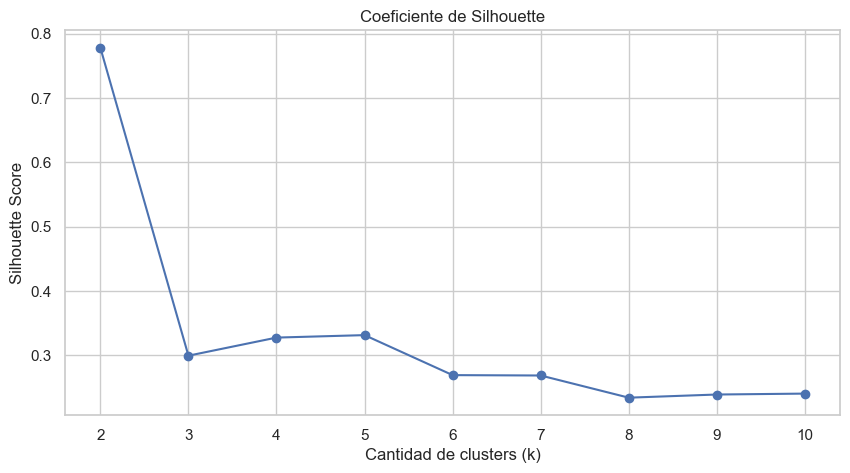


=== Modelo Final K-Means (k=3) ===


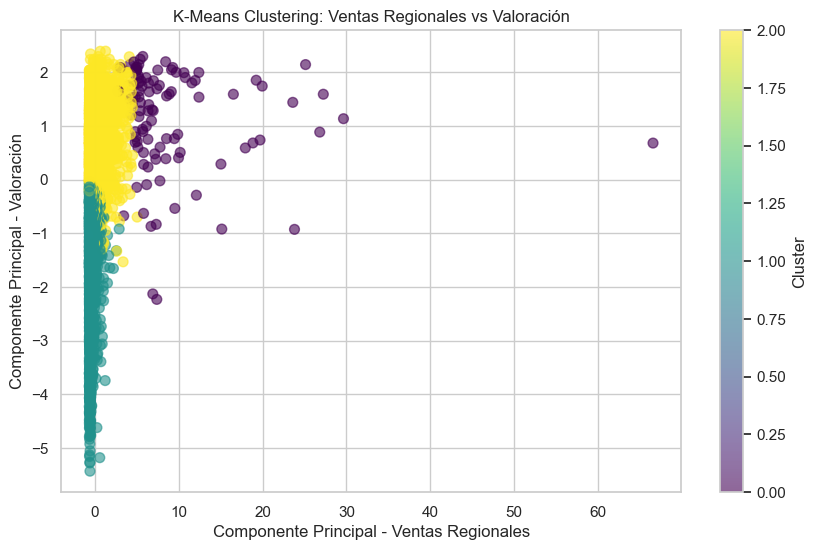


=== PCA para Visualización ===
Varianza explicada acumulada: 0.7065


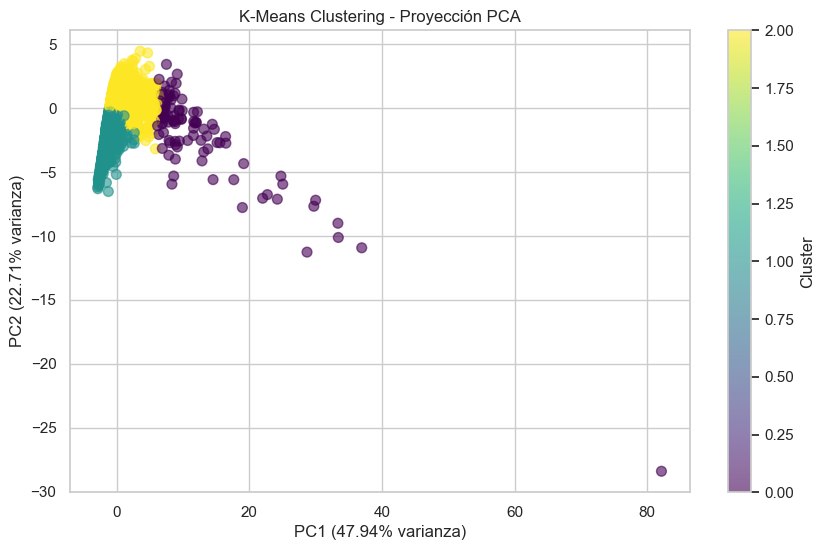


=== Características promedio por Cluster ===
         NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  User_Score  \
Cluster                                                                        
0        4.891068  3.641845  1.326893     1.313107     87.223301    7.773786   
1        0.164001  0.081943  0.011194     0.030427     56.084061    5.820579   
2        0.398734  0.228324  0.059201     0.077988     77.222968    7.879718   

         Critic_Count   User_Count  Global_Sales  Ventas_Regionales_PC  \
Cluster                                                                  
0           57.475728  1573.359223     11.172330              9.263552   
1           18.606339    53.634819      0.287740             -0.414585   
2           33.028479   190.268581      0.764439             -0.011946   

         Valoracion_PC  
Cluster                 
0             1.141676  
1            -1.409362  
2             0.683164  


In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preparar datos para PCA y Clustering
cols_clustering = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score', 
                   'User_Score', 'Critic_Count','User_Count','Global_Sales']

df_cluster = df_clean[cols_clustering].copy()

# Convertir a numérico
df_cluster = df_cluster.apply(pd.to_numeric, errors='coerce')
df_cluster = df_cluster.dropna()

print(f"Datos para clustering: {df_cluster.shape}")

# PCA - Componente de Ventas Regionales
regional_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
scaler_reg = StandardScaler()
regional_scaled = scaler_reg.fit_transform(df_cluster[regional_cols])

pca_reg = PCA(n_components=1)
df_cluster["Ventas_Regionales_PC"] = pca_reg.fit_transform(regional_scaled)
print(f"PCA Ventas Regionales - Varianza explicada: {pca_reg.explained_variance_ratio_[0]:.4f}")

# PCA - Componente de Valoración
valoracion_cols = ['Critic_Score', 'User_Score']
scaler_val = StandardScaler()
valoracion_scaled = scaler_val.fit_transform(df_cluster[valoracion_cols])

pca_val = PCA(n_components=1)
df_cluster["Valoracion_PC"] = pca_val.fit_transform(valoracion_scaled)
print(f"PCA Valoración - Varianza explicada: {pca_val.explained_variance_ratio_[0]:.4f}")

# Escalado previo a K-Means
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df_cluster)

# Método del Codo
print("\n=== Método del Codo ===")
wcss = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(scaler_data)
    wcss.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid(True)
plt.show()

# Silhouette Score
print("\n=== Silhouette Score ===")
sil_score = []
k_range_sil = range(2, 11)

for k in k_range_sil:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(scaler_data)
    sil = silhouette_score(scaler_data, labels)
    sil_score.append(sil)
    print(f"k={k}: Silhouette Score = {sil:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(k_range_sil, sil_score, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Modelo Final K-Means
k_cluster = 3  # Basado en los análisis anteriores

print(f"\n=== Modelo Final K-Means (k={k_cluster}) ===")
final_model = KMeans(n_clusters=k_cluster, n_init=10, random_state=42)
cluster_labels = final_model.fit_predict(scaler_data)

df_cluster['Cluster'] = cluster_labels

# Visualización: Ventas Regionales vs Valoración
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_cluster["Ventas_Regionales_PC"], 
                      df_cluster["Valoracion_PC"], 
                      c=cluster_labels, 
                      cmap='viridis', 
                      alpha=0.6, 
                      s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering: Ventas Regionales vs Valoración')
plt.xlabel('Componente Principal - Ventas Regionales')
plt.ylabel('Componente Principal - Valoración')
plt.grid(True)
plt.show()

# PCA para visualización en 2D
print("\n=== PCA para Visualización ===")
pca_viz = PCA(n_components=2)
pca_data = pca_viz.fit_transform(scaler_data)
print(f"Varianza explicada acumulada: {pca_viz.explained_variance_ratio_.sum():.4f}")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering - Proyección PCA')
plt.xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.2%} varianza)')
plt.grid(True)
plt.show()

# Análisis de características por cluster
print("\n=== Características promedio por Cluster ===")
cluster_summary = df_cluster.groupby('Cluster')[cols_clustering + ['Ventas_Regionales_PC', 'Valoracion_PC']].mean()
print(cluster_summary)

## 10. Resultados y Conclusiones

En esta sección se sintetizan los principales resultados obtenidos a lo largo del análisis estadístico, dando respuesta a las preguntas de investigación planteadas inicialmente. Asimismo, se discuten las implicaciones de los hallazgos, las limitaciones del estudio y se proponen posibles líneas de trabajo futuro.

### 10.1 Síntesis de resultados

#### Resultados asociados a la Pregunta de Investigación 1

El análisis comparativo de las ventas globales de videojuegos según su género se realizó mediante una prueba de hipótesis, aplicando ANOVA de una vía o, en caso necesario, la prueba no paramétrica de Kruskal–Wallis. Los resultados obtenidos indican que [se rechaza / no se rechaza] la hipótesis nula, evidenciando que [existen / no existen] diferencias estadísticamente significativas en las ventas globales entre los distintos géneros de videojuegos.

Este resultado sugiere que el género constituye un factor relevante en el desempeño comercial de los videojuegos, aunque las diferencias observadas presentan una variabilidad considerable dentro de cada categoría, lo que refleja la heterogeneidad del mercado.

#### Resultados asociados a la Pregunta de Investigación 2

Con el objetivo de evaluar la relación entre las valoraciones de críticos y usuarios y las ventas globales, se ajustó un modelo de regresión lineal múltiple. El modelo obtuvo un coeficiente de determinación $R^2$ de [valor], lo que indica que las variables de valoración explican una proporción moderada de la variabilidad en las ventas globales.

El contraste global del modelo mostró un resultado estadísticamente [significativo / no significativo], lo que implica que [al menos una / ninguna] de las variables explicativas incluidas ejerce un efecto relevante sobre las ventas. A nivel individual, se observó que [mencionar variables significativas, si aplica] presentan una asociación estadísticamente significativa con el desempeño comercial.

Estos hallazgos sugieren que, si bien las valoraciones influyen en las ventas, no constituyen el único factor determinante del éxito comercial de un videojuego.

#### Resultados asociados a la Pregunta de Investigación 3

El análisis multivariante mediante Análisis de Componentes Principales permitió reducir la dimensionalidad del conjunto de datos, conservando aproximadamente [porcentaje]% de la varianza total en los primeros componentes. Esta reducción facilitó la identificación de patrones globales en los datos.

Posteriormente, la aplicación de técnicas de clustering permitió identificar [número] grupos diferenciados de videojuegos, caracterizados por perfiles distintos en términos de ventas regionales y valoraciones. Estos clusters reflejan la existencia de segmentos de mercado con comportamientos diferenciados, que no resultan evidentes a partir de análisis univariantes o bivariantes.

### 10.2 Conclusiones generales

El análisis estadístico realizado evidencia que el mercado de videojuegos presenta una estructura compleja, influenciada por múltiples factores. Los resultados obtenidos permiten concluir que:

- El género del videojuego tiene un impacto significativo en las ventas globales, aunque no determina de manera exclusiva su éxito comercial.

- Las valoraciones de críticos y usuarios influyen de forma relevante en el desempeño de ventas, pero explican únicamente una parte de la variabilidad observada.

- Existen perfiles diferenciados de videojuegos cuando se analizan simultáneamente variables de ventas y recepción crítica, lo que confirma la utilidad de enfoques multivariantes para el estudio del mercado.

En conjunto, estos resultados aportan una visión integrada del fenómeno estudiado y demuestran la pertinencia de las técnicas estadísticas aplicadas.

### 10.3 Limitaciones del estudio

A pesar de los resultados obtenidos, este estudio presenta algunas limitaciones que deben ser consideradas:

- La presencia de valores faltantes redujo el tamaño efectivo de la muestra en algunos análisis.

- El dataset no incluye variables relacionadas con factores externos, como estrategias de marketing, presupuesto de desarrollo o contexto económico, que podrían influir significativamente en las ventas.

- El análisis se basa en datos históricos, por lo que los resultados pueden no ser completamente extrapolables a tendencias actuales del mercado.

### 10.4 Trabajo futuro

Como posibles extensiones de este trabajo, se proponen las siguientes líneas de investigación:

- Incorporar variables adicionales, como costos de producción o campañas publicitarias, para mejorar la capacidad explicativa de los modelos.

- Aplicar técnicas de clasificación supervisada para predecir el éxito comercial de nuevos lanzamientos.

- Realizar análisis temporales para estudiar la evolución del mercado de videojuegos a lo largo del tiempo.

### 10.5 Cierre final

En conclusión, este proyecto demuestra cómo la aplicación sistemática de técnicas estadísticas permite extraer conocimiento relevante a partir de datos reales, ofreciendo una comprensión más profunda del comportamiento del mercado de videojuegos y sentando las bases para análisis más avanzados en estudios futuros.